In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
from io import StringIO
from collections import Counter

In [2]:
classes = 10

<Axes: ylabel='count'>

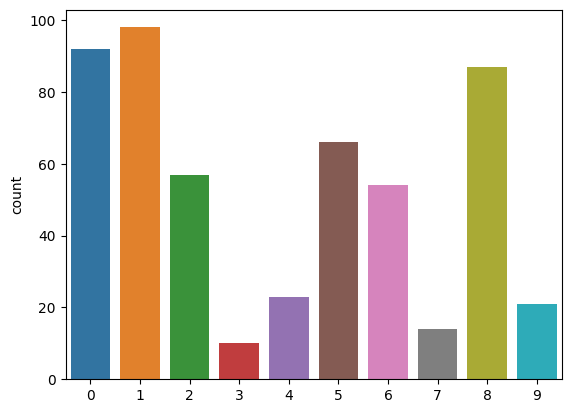

In [3]:
all_data = []
_ = [all_data.extend([i]*int(np.random.rand()*100)) for i in range(classes)]

sns.countplot(x = all_data)

In [4]:
from collections import Counter

In [5]:
frequency = Counter(all_data)
probabilities = {i: j/len(all_data)
                for i, j in frequency.items()}

<Axes: >

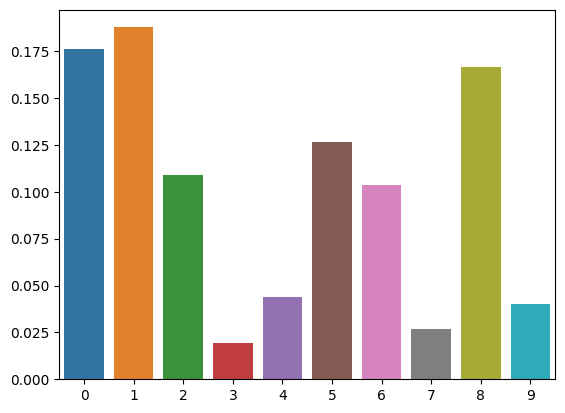

In [6]:
sns.barplot(x = list(probabilities.keys()), y = list(probabilities.values()))

# Empurity measures

In [7]:
# classification_error = 1 - probabilities of correctly classified data points
# Since we are predicting maximum frequency.
# Random Examples
classification_error = 1 - max(probabilities.values())
print(classification_error)

# In case of values are same and data is homogeneous, classification error will be 0.

0.8122605363984674


In [8]:
# Gini Impurity = sum of (probabilities * (1 - probabilites))
#  = sum(p*(1 - p))
#  = sum(p - p**2)
#  = sum(p) - sum(p**2)
#  = 1 - sum(p**2) # :. sum of probabilities is 1
gini_impurity = 1 - sum([p**2 for p in probabilities.values()])
print(gini_impurity)

0.862656155957781


In [9]:
# Entropy = -sum(p * log(p))
entropy = -sum([p*np.log2(p) for p in probabilities.values()])
print(entropy)

3.0242338560591646


In [10]:
# In all the measurement higher the value higher the impurity.  

# Information gain

In [11]:
# Information gain = Entropy before - Entropy after
box = [0,0,1,1,2,2,3,4]

In [12]:
frequency = Counter(box)
probabilities = {i: j/len(box)
                for i, j in frequency.items()}

In [13]:
# Entropy of box
entropy = -sum([p*np.log2(p) for p in probabilities.values()])
print(entropy)

2.25


In [14]:
probabilities

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.125, 4: 0.125}

In [15]:
# Splitting box
box_a = [0,0]
box_b = [1,1,2,2,3,4]

frequency_a = Counter(box_a)
probabilities_a = {i: j/len(box_a)
                for i, j in frequency_a.items()}

frequency_b = Counter(box_b)
probabilities_b = {i: j/len(box_b)
                for i, j in frequency_b.items()}


In [16]:
entropy_a = -sum([p*np.log2(p) for p in probabilities_a.values()])
print("entropy_a", entropy_a)
entropy_b = -sum([p*np.log2(p) for p in probabilities_b.values()])
print("entropy_b", entropy_b)

weight_a = len(box_a)/len(box)
weight_b = len(box_b)/len(box)

total_entropy = weight_a*entropy_a + weight_b*entropy_b 
print("total_entropy", total_entropy)

entropy_a -0.0
entropy_b 1.9182958340544893
total_entropy 1.438721875540867


In [17]:
information_gain = entropy - total_entropy
print("information_gain", information_gain)

information_gain 0.8112781244591329


# Creating tree using real data

In [2]:
data = '''age,sex,bp,cholestrol,heart_disease\n70,1,130,322,1\n67,0,115,564,0\n57,1,124,261,1\n64,1,128,263,0\n74,0,120,269,0\n65,1,120,177,0\n56,1,130,256,1\n59,1,110,239,1\n60,1,140,293,1\n63,0,150,407,1\n59,1,135,234,0\n53,1,142,226,0\n44,1,140,235,0\n61,1,134,234,1\n57,0,128,303,0\n71,0,112,149,0\n46,1,140,311,1\n53,1,140,203,1\n64,1,110,211,0\n40,1,140,199,0\n67,1,120,229,1\n48,1,130,245,0\n43,1,115,303,0\n47,1,112,204,0\n54,0,132,288,0\n48,0,130,275,0\n46,0,138,243,0\n51,0,120,295,0\n58,1,112,230,1\n71,0,110,265,0\n57,1,128,229,1\n66,1,160,228,0\n37,0,120,215,0\n59,1,170,326,1\n50,1,144,200,1\n48,1,130,256,1\n61,1,140,207,1\n59,1,160,273,1\n42,1,130,180,0\n48,1,122,222,0\n40,1,152,223,1\n62,0,124,209,0\n44,1,130,233,0\n46,1,101,197,0\n59,1,126,218,1\n58,1,140,211,0\n49,1,118,149,1\n44,1,110,197,1\n66,1,160,246,1\n65,0,150,225,1\n42,1,136,315,1\n52,1,128,205,0\n65,0,140,417,0\n63,0,140,195,0\n45,0,130,234,0\n41,0,105,198,0\n61,1,138,166,1\n60,0,120,178,0\n59,0,174,249,1\n62,1,120,281,1\n57,1,150,126,0\n51,0,130,305,1\n44,1,120,226,0\n60,0,150,240,0\n63,1,145,233,0\n57,1,150,276,1\n51,1,140,261,0\n58,0,136,319,1\n44,0,118,242,0\n47,1,108,243,1\n61,1,120,260,1\n57,0,120,354,0\n70,1,156,245,0\n76,0,140,197,0\n67,0,106,223,0\n45,1,142,309,1\n45,1,104,208,0\n39,0,94,199,0\n42,0,120,209,0\n56,1,120,236,0\n58,1,146,218,1\n35,1,120,198,1\n58,1,150,270,1\n41,1,130,214,0\n57,1,110,201,0\n42,1,148,244,0\n62,1,128,208,0\n59,1,178,270,0\n41,0,126,306,0\n50,1,150,243,1\n59,1,140,221,0\n61,0,130,330,1\n54,1,124,266,1\n54,1,110,206,1\n52,1,125,212,1\n47,1,110,275,1\n66,1,120,302,0\n58,1,100,234,1\n64,0,140,313,0\n50,0,120,244,0\n44,0,108,141,0\n67,1,120,237,1\n49,0,130,269,0\n57,1,165,289,1\n63,1,130,254,1\n48,1,124,274,1\n51,1,100,222,0\n60,0,150,258,1\n59,1,140,177,1\n45,0,112,160,0\n55,0,180,327,1\n41,1,110,235,0\n60,0,158,305,1\n54,0,135,304,0\n42,1,120,295,0\n49,0,134,271,0\n46,1,120,249,1\n56,0,200,288,1\n66,0,150,226,0\n56,1,130,283,1\n49,1,120,188,1\n54,1,122,286,1\n57,1,152,274,1\n65,0,160,360,0\n54,1,125,273,0\n54,0,160,201,0\n62,1,120,267,1\n52,0,136,196,0\n52,1,134,201,0\n60,1,117,230,1\n63,0,108,269,1\n66,1,112,212,1\n42,1,140,226,0\n64,1,120,246,1\n54,1,150,232,0\n46,0,142,177,0\n67,0,152,277,0\n56,1,125,249,1\n34,0,118,210,0\n57,1,132,207,0\n64,1,145,212,1\n59,1,138,271,0\n50,1,140,233,1\n51,1,125,213,0\n54,1,192,283,1\n53,1,123,282,1\n52,1,112,230,1\n40,1,110,167,1\n58,1,132,224,1\n41,0,112,268,0\n41,1,112,250,0\n50,0,120,219,0\n54,0,108,267,0\n64,0,130,303,0\n51,0,130,256,0\n46,0,105,204,0\n55,1,140,217,1\n45,1,128,308,0\n56,1,120,193,0\n66,0,178,228,1\n38,1,120,231,1\n62,0,150,244,1\n55,1,130,262,0\n58,1,128,259,1\n43,1,110,211,0\n64,0,180,325,0\n50,0,110,254,0\n53,1,130,197,0\n45,0,138,236,0\n65,1,138,282,1\n69,1,160,234,0\n69,1,140,254,1\n67,1,100,299,1\n68,0,120,211,0\n34,1,118,182,0\n62,0,138,294,1\n51,1,140,298,1\n46,1,150,231,1\n67,1,125,254,1\n50,1,129,196,0\n42,1,120,240,0\n56,0,134,409,1\n41,1,110,172,1\n42,0,102,265,0\n53,1,130,246,0\n43,1,130,315,0\n56,1,132,184,1\n52,1,108,233,0\n62,0,140,394,0\n70,1,160,269,1\n54,1,140,239,0\n70,1,145,174,1\n54,1,108,309,0\n35,1,126,282,1\n48,1,124,255,0\n55,0,135,250,0\n58,0,100,248,0\n54,0,110,214,0\n69,0,140,239,0\n77,1,125,304,1\n68,1,118,277,0\n58,1,125,300,1\n60,1,125,258,1\n51,1,140,299,1\n55,1,160,289,1\n52,1,152,298,0\n60,0,102,318,0\n58,1,105,240,0\n64,1,125,309,1\n37,1,130,250,0\n59,1,170,288,1\n51,1,125,245,0\n43,0,122,213,0\n58,1,128,216,1\n29,1,130,204,0\n41,0,130,204,0\n63,0,135,252,0\n51,1,94,227,0\n54,1,120,258,0\n44,1,120,220,0\n54,1,110,239,1\n65,1,135,254,1\n57,1,150,168,0\n63,1,130,330,1\n35,0,138,183,0\n41,1,135,203,0\n62,0,130,263,1\n43,0,132,341,1\n58,0,150,283,0\n52,1,118,186,0\n61,0,145,307,1\n39,1,118,219,1\n45,1,115,260,0\n52,1,128,255,1\n62,1,130,231,0\n62,0,160,164,1\n53,0,138,234,0\n43,1,120,177,1\n47,1,138,257,0\n52,1,120,325,0\n68,1,180,274,1\n39,1,140,321,0\n53,0,130,264,0\n62,0,140,268,1\n51,0,140,308,0\n60,1,130,253,1\n65,1,110,248,1\n65,0,155,269,0\n60,1,140,185,1\n60,1,145,282,1\n54,1,120,188,1\n44,1,130,219,0\n44,1,112,290,1\n51,1,110,175,0\n59,1,150,212,0\n71,0,160,302,0\n61,1,150,243,0\n55,1,132,353,1\n64,1,140,335,1\n43,1,150,247,0\n58,0,120,340,0\n60,1,130,206,1\n58,1,120,284,1\n49,1,130,266,0\n48,1,110,229,1\n52,1,172,199,0\n44,1,120,263,0\n56,0,140,294,0\n57,1,140,192,0\n67,1,160,286,1'''

In [30]:
def get_prob(box):
    frequency = Counter(box)
    probabilities = {i: j/len(box)
                for i, j in frequency.items()}
    return probabilities


In [31]:
def get_entropy(probabilities):
    return -sum([p*np.log2(p) for p in probabilities.values()])

In [32]:
df = pd.read_csv(StringIO(data))
df = df.iloc[:10, :]

In [33]:
df

,age,sex,bp,cholestrol,heart_disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
5,65,1,120,177,0
6,56,1,130,256,1
7,59,1,110,239,1
8,60,1,140,293,1
9,63,0,150,407,1


In [34]:
df.dtypes

age              int64
sex              int64
bp               int64
cholestrol       int64
heart_disease    int64
dtype: object

In [35]:
probabilities = get_prob(df.heart_disease)
print("probabilities", probabilities)

entropy = get_entropy(probabilities)
print("entropy", round(entropy, 3))

probabilities {1: 0.6, 0: 0.4}
entropy 0.971


Making split

In [39]:
def get_information_gain(df, column, value):
    df1 = df[df[column] <= value]
    df2 = df[df[column] > value]
    df1_probablities = get_prob(df1.heart_disease)
#     print(f"Probabilities of df1_probablities:",df1_probablities)
    df1_entropy = get_entropy(df1_probablities)
#     print(f"Entropy of df1_entropy: {df1_entropy: 50}")

    df2_probablities = get_prob(df2.heart_disease)
#     print(f"Probabilities of df2_probablities:",df2_probablities)
    df2_entropy = get_entropy(df2_probablities)
#     print(f"Entropy of df2_entropy: {df2_entropy: 50}")

    weight_d1 = len(df1) / len(df)
    weight_d2 = len(df2) / len(df)
    print("Split d1 entropy: ", df1_entropy)
    print("Split d2 entropy: ", df2_entropy)
    
    entropy_d1_d2 = weight_d1*df1_entropy + weight_d2*df2_entropy
    print(f"Entropy after split {column} at {value}: ", entropy_d1_d2)
    information_gain = entropy - entropy_d1_d2
    return information_gain

In [40]:
# lets define some values at which we will split columns
define_split = {
    "sex": df.sex.mean(),
    "age": df.age.mean(),
    "cholestrol": df.cholestrol.mean(),
    "bp": df.bp.mean()
}

In [41]:
information_gains = {
    col: get_information_gain(df, col, val)
    for col, val in define_split.items()
}
print(information_gains)

Split d1 entropy:  0.9182958340544896
Split d2 entropy:  0.863120568566631
Entropy after split sex at 0.7:  0.8796731482129885
Split d1 entropy:  -0.0
Split d2 entropy:  0.7219280948873623
Entropy after split age at 63.5:  0.36096404744368116
Split d1 entropy:  0.9852281360342515
Split d2 entropy:  0.9182958340544896
Entropy after split cholestrol at 305.1:  0.965148445440323
Split d1 entropy:  0.9709505944546686
Split d2 entropy:  0.7219280948873623
Entropy after split bp at 126.7:  0.8464393446710154
{'sex': 0.0912774462416801, 'age': 0.6099865470109874, 'cholestrol': 0.0058021490143456145, 'bp': 0.12451124978365313}


In [42]:
split_col = list(information_gains)[np.argmax(list(information_gains.values()))]
print(split_col)

age


# Using sklearn

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [167]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5, min_samples_leaf=3, )

In [168]:
dtc.fit(X = df.iloc[:, :-1], y = df.iloc[:, -1:])

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=5)

In [44]:
plt.figure(figsize=(60,30))
plot_tree(dtc, feature_names = df.columns,class_names=['No Disease', "Disease"],filled=True);

NameError: name 'dtc' is not defined

<Figure size 6000x3000 with 0 Axes>